# Image Classification of Chest X_ray Images of Pneumonia With Neural Networks

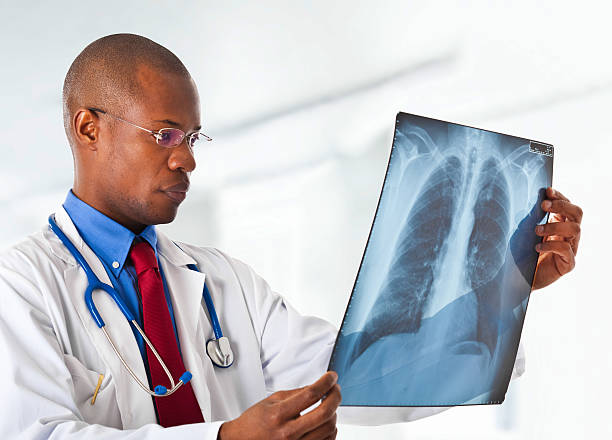

## Authors:

* Kellen Kinya
* Susan Kanyora
* Brian Kisilu
* Steve Githinji
* William Onsare
* Daniel Ekale


[github link](https://github.com/stevegithinji/Image-Classification-Chest-X-Ray-Images-Pneumonia-/tree/master)


## Introduction 

## Overview ##

Pneumonia, a serious respiratory infection caused by viruses or bacteria, is a worldwide public health concern. It is the greatest infectious cause of death in children worldwide, killing around 740,180 children in 2019. Furthermore, vulnerable populations such as elders, smokers, and people with underlying health concerns are more vulnerable. While pneumonia has a terrible impact on communities and families, it can be prevented and treated with basic actions and low-cost drugs. The importance of early detection and proper diagnosis in saving lives and minimizing the burden cannot be overstated. Despite limited resources in low- and middle-income nations, focusing on prevention and access to reasonable therapies can lower death rates dramatically.

## Problem Statement

Pan African Medical Training & Research Center has tasked the team with developing a neural network model to accurately detect pneumonia in patients by analyzing chest X-ray images in the Chest X-Ray Images (Pneumonia) dataset.
We focus on leveraging advanced machine learning techniques on this dataset containing numerous images. Thorough training on this dataset will ensure the model's reliability and performance across different scenarios. Once integrated, the model will provide automated analysis, assisting treatment decisions and reducing potential human errors. It will also serve as a valuable training tool, empowering medical professionals to enhance their diagnostic skills. Our goal is to improve patient outcomes, contribute to medical research, and advance the field of pneumonia diagnosis.

## Data understanding
The Chest X-Ray dataset focuses on pneumonia detection in chest X-ray images. It consists of a collection of chest radiographs labeled as either "normal" or "pneumonia" cases. The dataset has been derived from multiple sources, including pediatric and adult patients, and encompasses various types of pneumonia, such as bacterial and viral.
The images are in JPEG format and typically grayscale, with varying resolutions and sizes. The dataset contains training and testing subsets, enabling the development and evaluation of machine-learning models for pneumonia detection.
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

## Objectives
The main goal of this undertaking is to create a Neural Network model capable of reliably categorizing chest X-ray pictures as having or not having pneumonia.
###  Specific Objectives:
* Train and refine a Neural Network model to obtain high accuracy in categorizing chest X-ray pictures as positive or negative for pneumonia.
* Validate the trained model using appropriate evaluation metrics and datasets to ensure its robustness and generalizability in real-world scenarios.
* Document and communicate the findings and insights from the project to contribute to the scientific community's knowledge and advance the field of pneumonia detection using a deep learning technique.


## Success Metrics
The performance of the model is evaluated based on:
* Accuracy - achieving an accuracy of over 85%
* Recall - achieving a recall of over 65%
* Loss Function - minimize loss function to ensure the model is not overfitting

In [2]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from keras import layers, models, regularizers, optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report

Before getting into building our models, we load our data. The images are in separate folders based on their classes, with one folder for each class within the train, test, and validation folders. Below the paths are set accordingly.

In [3]:
# Set the paths to train, test, and validation folders
train_folder = 'Data/train'
test_folder = 'Data/test'
val_folder = 'Data/val'


Below, we load and preprocess the images from the specified directories. The pixel values are rescaled to be between 0 and  The target_size parameter sets the desired dimensions of the images, and the class_mode parameter is set to 'binary' since this is a binary classification.

In [4]:
# Downsampling the images to 128X128 pixels
downsampled_size = (128, 128)

# Rescale pixel values between 0 and 1
datagen = ImageDataGenerator(rescale=1./255)  

# Load the train data
train_generator = datagen.flow_from_directory(
    train_folder,
    target_size=downsampled_size,
    batch_size=5216,
    class_mode='binary',
    shuffle=True
)

# Load the test data
test_generator = datagen.flow_from_directory(
    test_folder,
    target_size=downsampled_size,
    batch_size=624,
    class_mode='binary',
    shuffle=False
)

# Load the validation data
val_generator = datagen.flow_from_directory(
    val_folder,
    target_size=downsampled_size,
    batch_size=16,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


*  This dataset is separated into three folders. The "train" folder contains 5,216 images, the "validation" folder has 16 images, and the "test" folder contains 624 images.
* Each folder consists of two classes. One class represents normal chest X-rays, and the other class represents chest X-rays with pneumonia.

In the next step, we will perform exploratory data analysis (EDA) to examine the class distribution.


## Explanatory Data Analysis

In [5]:
# Retrieve the dictionary of class indices from the train_generator
dict_class = train_generator.class_indices
print('Dictionary: {}'.format(dict_class))
class_names = list(dict_class.keys())
# Print the list of class labels
print('Class labels: {}'.format(class_names))


Dictionary: {'NORMAL': 0, 'PNEUMONIA': 1}
Class labels: ['NORMAL', 'PNEUMONIA']


Below, we will use matplotlib to display samples of the images from our dataset. The corresponding label is set as the title for each subplot.

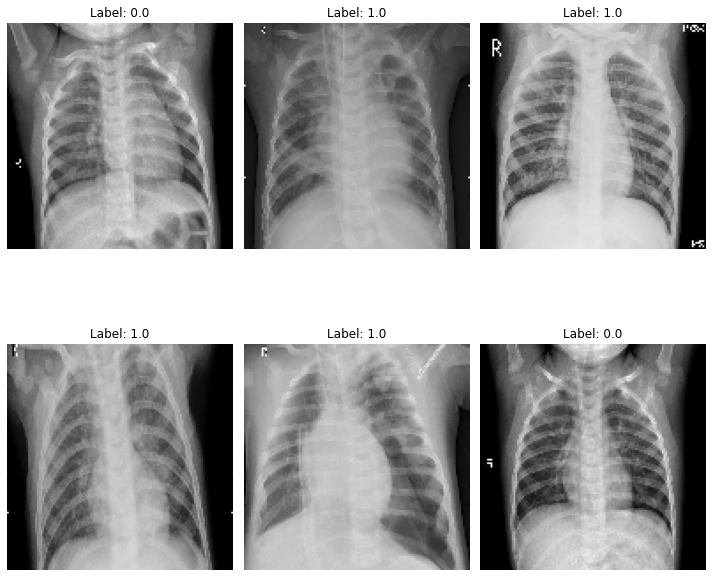

In [5]:
# Get a batch of images from the train generator
batch = next(train_generator)

# Extract the images and labels from the batch
images, labels = batch

# Display the first few images with their corresponding labels
num_images = 6

fig, axes = plt.subplots(2, 3, figsize=(10, 10))
for i in range(num_images):
    axes[i//3, i%3].imshow(images[i], cmap='RdBu')
    axes[i//3, i%3].set_title('Label: {}'.format(labels[i]))
    axes[i//3, i%3].axis('off')

plt.tight_layout()
plt.show()

Class 0 represents chest X-ray images without pneumonia, while class 1 contains images with pneumonia. Differentiating between these two classes is challenging due to their visual similarity. Therefore, there is a need for a more accurate and effective model that can easily distinguish between them and improve pneumonia detection.

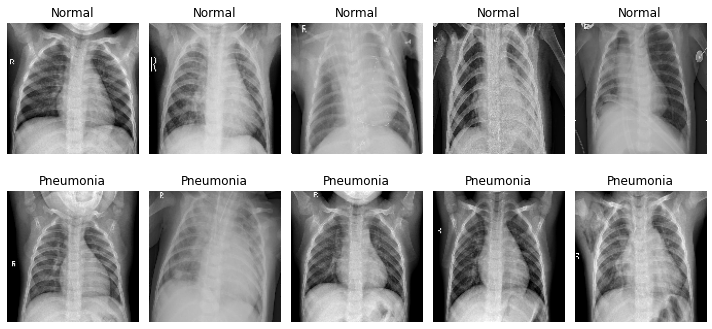

In [107]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(5):
    # Normal Images
    img, _ = train_generator.next()  # Retrieve the next batch from the train_generator
    axes[i].imshow(img[i], cmap='gray')
    axes[i].set_title('Normal')
    axes[i].axis('off')

    # Pneumonia Images
    img, _ = train_generator.next()  # Retrieve the next batch from the train_generator
    axes[i + 5].imshow(img[i], cmap='gray')
    axes[i + 5].set_title('Pneumonia')
    axes[i + 5].axis('off')

plt.tight_layout()
plt.show()

In [100]:
"""Function to visualize class distributions"""
def plot_class_counts(labels, title):
    # Get the counts for each class
    class_labels, counts = np.unique(labels, return_counts=True)
    # Calculate the percentage of value counts
    total_count = np.sum(counts)
    percentages = counts / total_count * 100
    # Plot the results
    plt.figure(figsize=(12,10))
    plt.title(f'{title}', fontsize='20')
    plt.xlabel("Classes")
    plt.ylabel("Count")
    # Replace "1" with "Normal" in class_labels list
    class_labels = ['Pneumonia', 'Normal']
    # Add value counts as text on top of each bar
    for i in range(len(class_labels)):
        plt.text(i, counts[i], f"{counts[i]}\n{percentages[i]:.2f}%", ha='left', va='top')
    sns.barplot(x=class_labels, y=counts)
    plt.show()

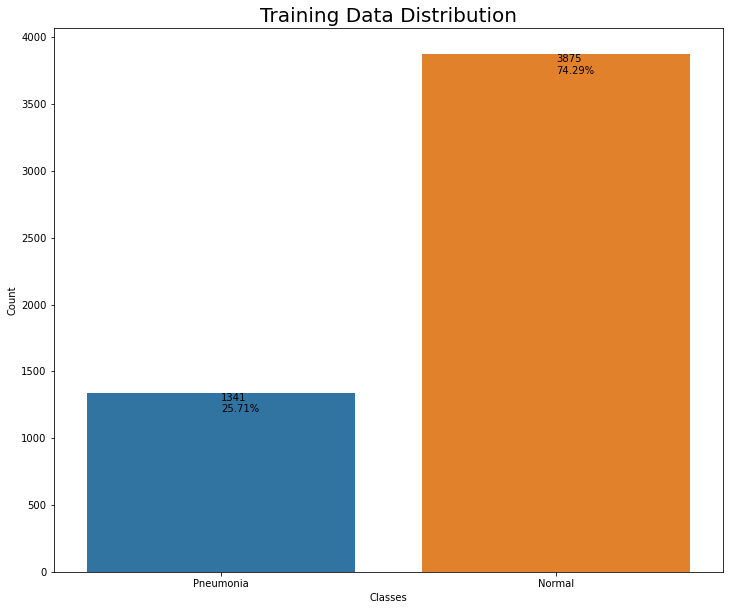

In [101]:
#training data distribution
labels = train_generator.classes
plot_class_counts(labels, 'Training Data Distribution')

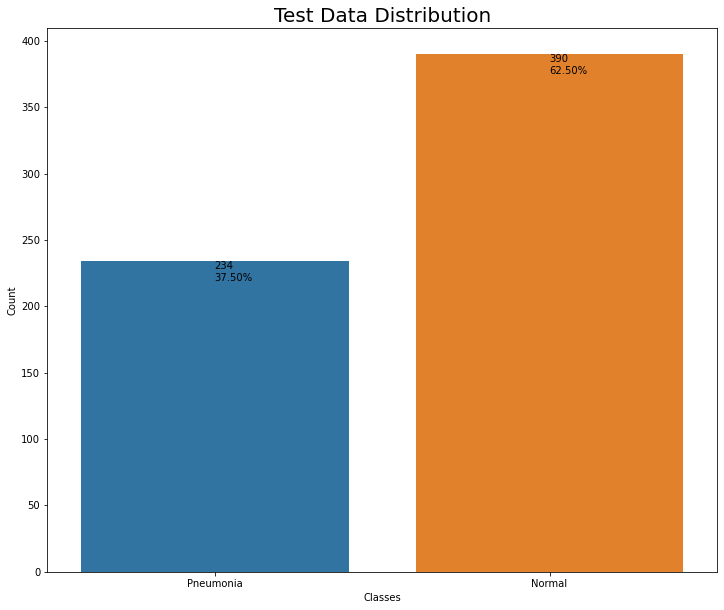

In [8]:
#test data distribution
test_labels = test_generator.classes
plot_class_counts(test_labels, 'Test Data Distribution')

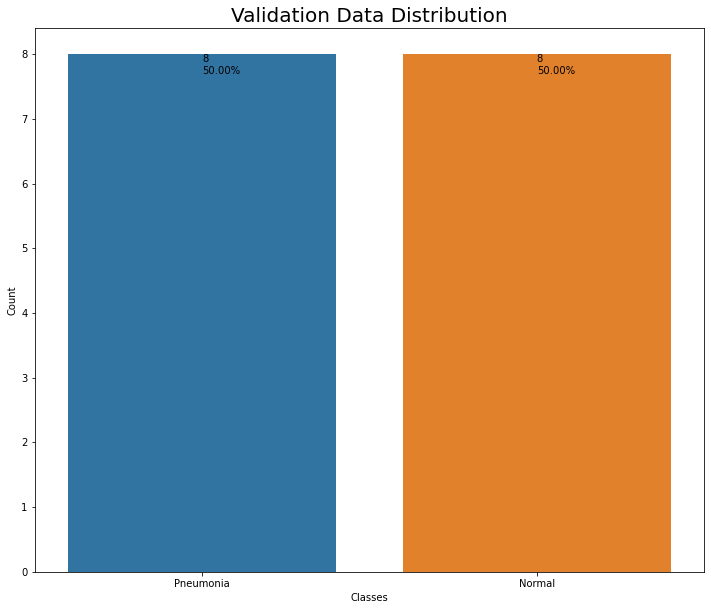

In [9]:
#validation data distribution
vals_labels = val_generator.classes
plot_class_counts(vals_labels, 'Validation Data Distribution')

* About 75 percent of training data comes from a normal chest xray and 25 percent from a chest xray with pneumonia.
* 70 percent of the test data also has images with normal chest xray and 30 percent containing  chest xrays images with pneumonia.
* the validation class is evenly distributed.

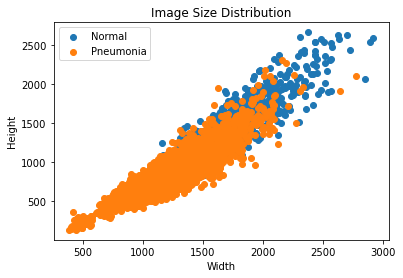

In [10]:
from PIL import Image
normal_image_sizes = []
pneumonia_image_sizes = []
for image_path in train_generator.filepaths:
    img = Image.open(image_path)
    width, height = img.size
    if "NORMAL" in image_path:
        normal_image_sizes.append((width, height))
    else:
        pneumonia_image_sizes.append((width, height))
normal_image_sizes = np.array(normal_image_sizes)
pneumonia_image_sizes = np.array(pneumonia_image_sizes)
plt.scatter(normal_image_sizes[:, 0], normal_image_sizes[:, 1], label='Normal')
plt.scatter(pneumonia_image_sizes[:, 0], pneumonia_image_sizes[:, 1], label='Pneumonia')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Size Distribution')
plt.legend()
plt.show()

### EDA CONCLUSIONS
1. The dataset is divided into three folders: "train" with 5,216 images, "test" with 624 images, and "val" with 16 images. There are two classes in the dataset: "NORMAL" (representing normal chest X-rays) whose coresponding label is 0 and "PNEUMONIA" (representing chest X-rays with pneumonia) whose coresponding label is 1.
2. The "Pneumonia" class being significantly more represented than the "Normal" class. This is a common problem in medical datasets, and it can make it more challenging to train a machine learning model that can accurately distinguish between the two classes.
3. images of x rays of people with pneumonia seem to have a smaller width and height although not distinctively
4. There is some overlap in the distribution of image sizes for the two classes. This suggests that there are some images that are difficult to classify, even with human experts and that is why we need machine learning.


## Data Preprocessing

Here we obtain images and labels from the train, test and val generators where the images and labels are returned as arrays. The train_images array contains the image data, and the train_labels array contains the corresponding labels.

In [8]:
# obtain images and labels from the test generator
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Below we explore and display information about the shape and size of the image and label datasets. By printing these values, we can get an overview of the number of samples and the dimensions of the image and label arrays in our dataset.

In [9]:
# Explore the shape of the images and labels
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

train_labels =np.array(train_labels)
test_labels =np.array(test_labels)
val_labels = np.array(val_labels)


print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 128, 128, 3)
train_labels shape: (5216,)
test_images shape: (624, 128, 128, 3)
test_labels shape: (624,)
val_images shape: (16, 128, 128, 3)
val_labels shape: (16,)


In [10]:
# Reshaping the images
# number of images per data, 128X128X3
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 49152)
(624, 49152)
(16, 49152)


#   Modeling

##  Baseline model : A Densely Connected Neural Network

First, we build a baseline fully connected network using the Keras Sequential API. It has two hidden layers and an output layer. The first two layers have ReLU activation, which introduces non-linearity to the model. The final layer uses a sigmoid activation function, which produces a probability output between 0 and 1 for binary classification.

In [14]:
# Build a baseline fully connected network

#initialize a sequential model
model_1 = models.Sequential()

#2 layers with relu activation
model_1.add(layers.Dense(64, activation='relu', input_shape=(49152,))) 
model_1.add(layers.Dense(32, activation='relu'))

#one layer with sigmoid activation
model_1.add(layers.Dense(1, activation='sigmoid'))

In [15]:
#compile the model
model_1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Let's inspect the shape of our model before training it and see how many training parameters we have.

In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3145792   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,147,905
Trainable params: 3,147,905
Non-trainable params: 0
_________________________________________________________________


*  this baseline model has 3,145,792 trainable parameters!

In [17]:
#train the model
results_1 = model_1.fit(train_img,
                    train_labels,
                    epochs=10,
                    batch_size=100,

                    validation_data=(val_img, val_labels))

Epoch 1/10
53/53 [==============================] - 2s 36ms/step - loss: 0.5560 - accuracy: 0.7291 - val_loss: 0.8006 - val_accuracy: 0.5000
Epoch 2/10
53/53 [==============================] - 1s 28ms/step - loss: 0.4433 - accuracy: 0.7974 - val_loss: 0.8446 - val_accuracy: 0.5000
Epoch 3/10
53/53 [==============================] - 1s 28ms/step - loss: 0.4165 - accuracy: 0.8127 - val_loss: 2.3248 - val_accuracy: 0.5000
Epoch 4/10
53/53 [==============================] - 1s 28ms/step - loss: 0.3687 - accuracy: 0.8510 - val_loss: 1.0775 - val_accuracy: 0.5625
Epoch 5/10
53/53 [==============================] - 2s 29ms/step - loss: 0.3145 - accuracy: 0.8715 - val_loss: 0.9059 - val_accuracy: 0.6250
Epoch 6/10
53/53 [==============================] - 2s 29ms/step - loss: 0.2611 - accuracy: 0.8997 - val_loss: 0.6898 - val_accuracy: 0.6875
Epoch 7/10
53/53 [==============================] - 2s 29ms/step - loss: 0.2414 - accuracy: 0.9068 - val_loss: 0.3494 - val_accuracy: 0.8750
Epoch 8/10
53

Now, let's inspect the model's performance and see if we detect any overfitting or other issues by plotting:

* The loss and val_loss over the training epochs
* The acc and val_acc over the training epochs

A model is overfitting if:
* The model's training performance steadily improve long after the validation performance plateaus. 
* The training loss continues to decrease and the training accuracy continues to increase, and the distance between the two lines gets greater as the epochs gets higher.

In [18]:
"""Function to plot the loss and Accuracy curves"""
def visualize_training_results_dense(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

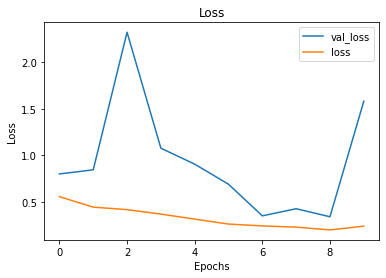

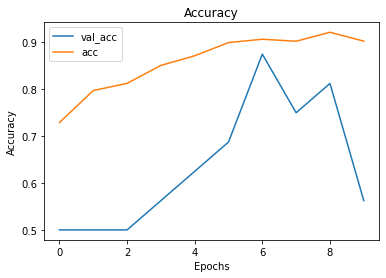

In [19]:
visualize_training_results_dense(results_1)

In [108]:
"""Function that return loss and accuracy of a model"""
def model_metrics(model, images, labels):
    return model.evaluate(images, labels)

In [109]:
results_train = model_metrics(model_1, train_img, train_labels)
results_train

163/163 [==============================] - 245s 2s/step - loss: 0.4838 - accuracy: 0.8125


[0.4837769567966461, 0.8125]

In [126]:
results_val = model_metrics(model_1, val_img, val_labels)
results_val

1/1 [==============================] - 0s 2ms/step - loss: 1.5825 - accuracy: 0.5625


[1.582468032836914, 0.5625]

With a validation accuracy of 56 percent  and a training accuracy of 76 percent we can infer that this densely connected neural network overfits to the training data.

Thus we create a CNN with the same number of layers as this Neural network and see how it perfoms




# model 2: CNN

the second model is  sequential model with two convolutional layers followed by max pooling layers, and a final fully connected layer. The convolutional layers extract features from the input images, the max pooling layers reduce the spatial dimensions, and the dense layer at the end performs the classification.

In [11]:
#initialize a sequential model 
model_2 = models.Sequential()

#add 2 convolutional layers with pooling
model_2.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(128 , 128,  3)))
#downsampling the previous convolutional network
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(32, (3,3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

#flattening to convert the 2d array in a 1d to feed in the next layer
model_2.add(layers.Flatten())
model_2.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model_2.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 28801     
Total params: 49,057
Trainable params: 49,057
Non-trainable params: 0
____________________________________________________


 Total trainable parameters are 49,057

In [27]:
"""Function to plot the loss function"""
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [13]:
results_2 = model_2.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=100,
                    validation_data=(val_images, val_labels))

Epoch 1/10
53/53 [==============================] - 196s 4s/step - loss: 0.5489 - acc: 0.7327 - val_loss: 0.7929 - val_acc: 0.5000
Epoch 2/10
53/53 [==============================] - 206s 4s/step - loss: 0.4490 - acc: 0.8025 - val_loss: 0.5322 - val_acc: 0.6250
Epoch 3/10
53/53 [==============================] - 184s 3s/step - loss: 0.4186 - acc: 0.8288 - val_loss: 0.7369 - val_acc: 0.6250
Epoch 4/10
53/53 [==============================] - 146s 3s/step - loss: 0.3338 - acc: 0.8631 - val_loss: 0.6354 - val_acc: 0.6875
Epoch 5/10
53/53 [==============================] - 129s 2s/step - loss: 0.3001 - acc: 0.8744 - val_loss: 0.4526 - val_acc: 0.8125
Epoch 6/10
53/53 [==============================] - 140s 3s/step - loss: 0.2271 - acc: 0.9120 - val_loss: 0.3883 - val_acc: 0.8125
Epoch 7/10
53/53 [==============================] - 124s 2s/step - loss: 0.2303 - acc: 0.9137 - val_loss: 1.0088 - val_acc: 0.6250
Epoch 8/10
53/53 [==============================] - 152s 3s/step - loss: 0.1960 - a

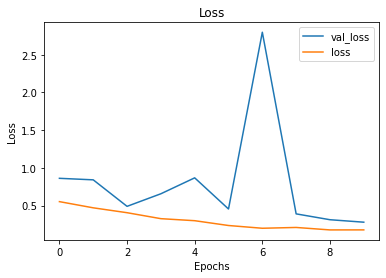

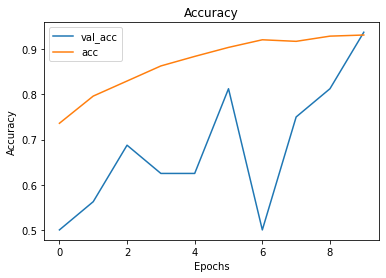

In [28]:
#visualizing loss and accuracy for the cnn model
visualize_training_results(results_2)

In [124]:
#model evaluation
results_train = model_metrics(model_2, train_images, train_labels)
results_train

163/163 [==============================] - 22s 138ms/step - loss: 0.1954 - acc: 0.9243


[0.19536364078521729, 0.9242714643478394]

In [125]:
#model evaluation
results_val = model_metrics(model_2, val_images, val_labels)
results_val

1/1 [==============================] - 0s 0s/step - loss: 0.2798 - acc: 0.9375


[0.2797941565513611, 0.9375]

The training process yielded a training loss of 0.195 and a training accuracy of 92.4%, indicating that the model is effectively learning from the training data. Additionally, the validation loss of 0.280 and the validation accuracy of 93.8% demonstrate that the model is generalizing well to unseen data, further confirming its robustness and ability to make accurate predictions.

This  model performs way better than the baseline model.Let's now try tuning.

# Tuning CNN

##  Model 3 - CNN with Regularization and Dropout

## Dropout

Using dropout techniques allow us to reduce overfitting by training neural networks on different parts of the data thus ensuring that our model is not sensitive to noise in the data.

In [31]:
#instatiate a baseline model
model_3_1 = models.Sequential()
model_3_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_3_1.add(layers.MaxPooling2D((2, 2)))
model_3_1.add(layers.Dropout(0.25))  # Dropout layer with a rate of 0.25

model_3_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3_1.add(layers.MaxPooling2D((2, 2)))
model_3_1.add(layers.Dropout(0.25))

model_3_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3_1.add(layers.MaxPooling2D((2, 2)))
model_3_1.add(layers.Dropout(0.25))

model_3_1.add(layers.Flatten())
model_3_1.add(layers.Dense(64, activation='relu'))
model_3_1.add(layers.Dense(1, activation='sigmoid'))


In [32]:
model_3_1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
results_3_1 = model_3_1.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(val_images, val_labels))

Epoch 1/10
163/163 [==============================] - 84s 516ms/step - loss: 0.3555 - accuracy: 0.8455 - val_loss: 0.5598 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 83s 509ms/step - loss: 0.1383 - accuracy: 0.9444 - val_loss: 0.5329 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 82s 501ms/step - loss: 0.1101 - accuracy: 0.9594 - val_loss: 0.2247 - val_accuracy: 0.9375
Epoch 4/10
163/163 [==============================] - 87s 536ms/step - loss: 0.0823 - accuracy: 0.9718 - val_loss: 0.4371 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 82s 504ms/step - loss: 0.0821 - accuracy: 0.9697 - val_loss: 0.3859 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 82s 502ms/step - loss: 0.0772 - accuracy: 0.9734 - val_loss: 0.2768 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 83s 506ms/step - loss: 0.0727 - accuracy: 0.9743 - val_loss: 0.1939 - val_ac

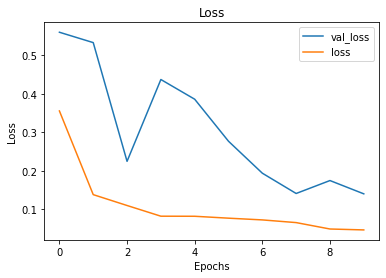

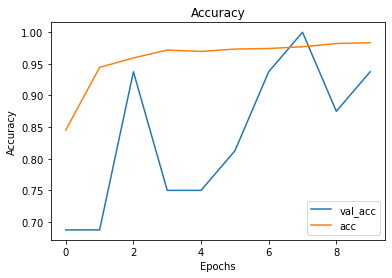

In [37]:
visualize_training_results_dense(results_3_1)

In [127]:
#model evaluation
results_train = model_metrics(model_3_1, train_images, train_labels)
results_train

163/163 [==============================] - 20s 123ms/step - loss: 0.0319 - accuracy: 0.9875


[0.03190586343407631, 0.9875383377075195]

In [128]:
#model evaluation
results_val = model_metrics(model_3_1, val_images, val_labels)
results_val

1/1 [==============================] - 0s 16ms/step - loss: 0.1403 - accuracy: 0.9375


[0.14031532406806946, 0.9375]

A validation accuracy of 93 percent with a loss of 0.03 and training accuracy of 98 percent with 0.14 loss

The model is  overfitting past the first
epoch so using dropout only to tune does not work, let's try another tuning technique.

##  Dropout and L2 Regularization

This model has Two 2D convolutional layers with ReLU activation and max pooling. and dropout layers with a rate of 0.25 after each pooling layer. It has a flatten layer to reshape the output  and
Two fully connected layers with ReLU activation. It finally has a fully connected layer with sigmoid activation for binary classification. The purpose of these modifications is to introduce regularization techniques (dropout and L2 regularization) to prevent overfitting and improve the generalization 
ability of the model

In [43]:
#instantiate a sequential model
model_3_2 = models.Sequential()
model_3_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_3_2.add(layers.MaxPooling2D((2, 2)))
model_3_2.add(layers.Dropout(0.25))  # Dropout layer with a rate of 0.25

# L2 regularization with a factor of 0.01
model_3_2.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3_2.add(layers.MaxPooling2D((2, 2)))
model_3_2.add(layers.Dropout(0.25))

# L2 regularization with a factor of 0.01
model_3_2.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3_2.add(layers.MaxPooling2D((2, 2)))
model_3_2.add(layers.Dropout(0.25))

model_3_2.add(layers.Flatten())
model_3_2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3_2.add(layers.Dense(1, activation='sigmoid'))


In [44]:
#compile the model
model_3_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [45]:
#fit the model on training and then validate
results_3_2 = model_3_2.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(val_images, val_labels))

Epoch 1/10
163/163 [==============================] - 84s 514ms/step - loss: 1.1520 - accuracy: 0.7742 - val_loss: 1.2116 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 83s 508ms/step - loss: 0.3859 - accuracy: 0.9020 - val_loss: 1.0781 - val_accuracy: 0.5625
Epoch 3/10
163/163 [==============================] - 82s 503ms/step - loss: 0.2986 - accuracy: 0.9170 - val_loss: 0.5853 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 83s 510ms/step - loss: 0.2679 - accuracy: 0.9247 - val_loss: 0.8018 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 82s 504ms/step - loss: 0.2702 - accuracy: 0.9231 - val_loss: 0.9614 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 82s 503ms/step - loss: 0.2341 - accuracy: 0.9348 - val_loss: 0.7578 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 85s 519ms/step - loss: 0.2426 - accuracy: 0.9319 - val_loss: 0.8313 - val_ac

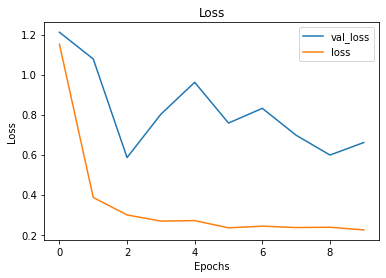

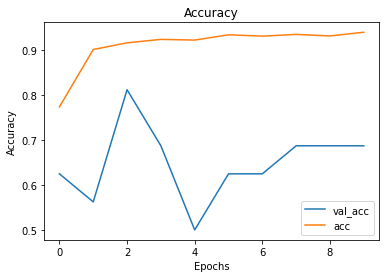

In [47]:
visualize_training_results_dense(results_3_2)

In [129]:
#model  perfomnce evaluation
results_train = model_metrics(model_3_2, train_images, train_labels)
results_train

163/163 [==============================] - 21s 126ms/step - loss: 0.1883 - accuracy: 0.9536


[0.18830116093158722, 0.9536042809486389]

In [130]:
#model evaluation
results_val = model_metrics(model_3_2, val_images, val_labels)
results_val

1/1 [==============================] - 0s 0s/step - loss: 0.6604 - accuracy: 0.6875


[0.6604235768318176, 0.6875]

Introducing L2 regularization and dropout layers does not tune this model or increase it's overall perfomance.The model   overfits on training  hence cannot be used to generalize on unseen data.

## Model 4 - CNN with Architecture modifications

##  Adding More  Layers

we've modified the architecture of the model by adding more convolutional layers and increasing the number of filters in each layer. Additionally, we've introduced two additional dense layers after the flattening layer.

In [50]:
model_4 = models.Sequential()
model_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))


model_4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Flatten())
model_4.add(layers.Dense(512, activation='relu'))
model_4.add(layers.Dense(256, activation='relu'))
model_4.add(layers.Dense(1, activation='sigmoid'))

In [51]:
model_4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
results_4 = model_4.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(val_images, val_labels))

Epoch 1/10
163/163 [==============================] - 91s 558ms/step - loss: 0.4033 - accuracy: 0.8230 - val_loss: 0.8321 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 89s 546ms/step - loss: 0.1486 - accuracy: 0.9459 - val_loss: 0.3737 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 89s 548ms/step - loss: 0.0904 - accuracy: 0.9670 - val_loss: 0.1501 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 90s 551ms/step - loss: 0.0865 - accuracy: 0.9668 - val_loss: 0.2917 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 89s 547ms/step - loss: 0.0649 - accuracy: 0.9780 - val_loss: 0.2749 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 89s 549ms/step - loss: 0.0484 - accuracy: 0.9826 - val_loss: 0.5168 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 116s 712ms/step - loss: 0.0418 - accuracy: 0.9837 - val_loss: 0.1413 - val_a

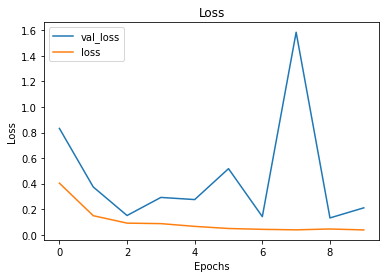

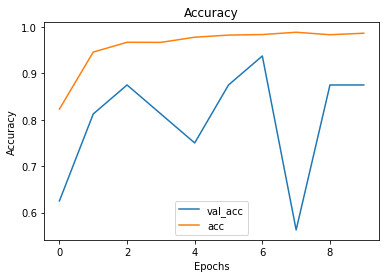

In [53]:
visualize_training_results_dense(results_4)

In [131]:
#model  perfomance evaluation
results_train = model_metrics(model_4, train_images, train_labels)
results_train

163/163 [==============================] - 25s 155ms/step - loss: 0.0159 - accuracy: 0.9950


[0.015929192304611206, 0.9950153231620789]

In [132]:
#model  perfomnce evaluation
results_val = model_metrics(model_4, val_images, val_labels)
results_val

1/1 [==============================] - 0s 0s/step - loss: 0.2101 - accuracy: 0.8750


[0.2100926637649536, 0.875]

For training, the output shows a low loss of 0.0159 and a high accuracy of 0.9950, indicating excellent performance on the training data.However, when evaluating the model on the validation data, the output reveals a slightly higher loss of 0.2101 and a lower accuracy of 0.875. This suggests that the model may be overfitting to the training data and struggling to generalize well to unseen data. Adding another hidden layer increased the model's capacity to capture complex patterns, but it also introduced more parameters, making it more prone to overfitting.

## More Layers, Regularization and Dropout

This model has Two 2D convolutional layers with ReLU activation and max pooling. It also has a dropout layer with a rate of 0.25 after each pooling layer, L1 and L2 regularization with a factor of 0.01 applied to the second, third, and fourth convolutional layers. It has a flatten layer to reshape the output before the fully connected layers.
One fully connected layer with ReLU activation and L1 and L2 regularization.
Final fully connected layer with sigmoid activation for binary classification.

Additionally, the model adds three more fully connected layers with ReLU activation
The purpose of these modifications is to introduce both L1 and L2 regularization to control the complexity of the model and prevent overfitting

In [59]:
#instantiate asequential model
model_5 = models.Sequential()
model_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Dropout(0.25))  # Dropout layer with a rate of 0.25

# L1 and L2 regularization with a factor of 0.01
model_5.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01))) 
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Dropout(0.25))

# L1 and L2 regularization with a factor of 0.01
model_5.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Dropout(0.25))

# L1 and L2 regularization with a factor of 0.01
model_5.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Dropout(0.25))

model_5.add(layers.Flatten())
model_5.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model_5.add(layers.Dense(1, activation='sigmoid'))

model_5.add(layers.Flatten())
model_5.add(layers.Dense(128, activation='relu'))
model_5.add(layers.Dense(256, activation='relu'))
model_5.add(layers.Dense(1, activation='sigmoid'))


In [60]:
model_5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [61]:
results_5 = model_5.fit(train_images,
                    train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(val_images, val_labels))

Epoch 1/10
163/163 [==============================] - 113s 696ms/step - loss: 14.0998 - accuracy: 0.7372 - val_loss: 1.2816 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 112s 686ms/step - loss: 1.0172 - accuracy: 0.7429 - val_loss: 1.2724 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 113s 695ms/step - loss: 1.0081 - accuracy: 0.7429 - val_loss: 1.2750 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 112s 689ms/step - loss: 1.0052 - accuracy: 0.7429 - val_loss: 1.2397 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 112s 688ms/step - loss: 1.0015 - accuracy: 0.7429 - val_loss: 1.2804 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 119s 729ms/step - loss: 0.9973 - accuracy: 0.7429 - val_loss: 1.2701 - val_accuracy: 0.5000
Epoch 7/10
163/163 [==============================] - 112s 689ms/step - loss: 0.9975 - accuracy: 0.7429 - val_loss: 1.2429 

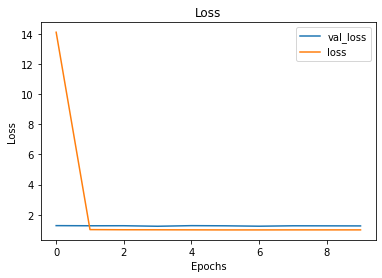

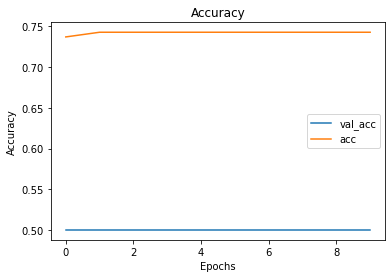

In [63]:
visualize_training_results_dense(results_5)

In [133]:
#model  perfomance evaluation
results_train = model_metrics(model_5, train_images, train_labels)
results_train

163/163 [==============================] - 17s 104ms/step - loss: 0.9965 - accuracy: 0.7429


[0.9965029358863831, 0.7429064512252808]

In [135]:
#model  perfomnce evaluation
results_val = model_metrics(model_5, val_images, val_labels)
results_val

1/1 [==============================] - 0s 0s/step - loss: 1.2629 - accuracy: 0.5000


[1.262891411781311, 0.5]

The model performs poorly on both training and validation data, it cannot be used in  image classification. 

Introduction of more layers and more regularization made  the model more complex and with increased complexity The model requires a larger amount of data to effectively learn the additional parameters, as more complexity means more information needs to be captured and processed. Insufficient data may have lead to overfitting, where our model becomes too specialized to the training data and fails to generalize well to new, unseen data.

##  Transfer Learning

Transfer learning involves taking model trained on a large dataset and transfer its knowledge to a smaller dataset.in CNN we freeze the early convolutional layers of the network and only train the last few layers which make a prediction.

### Feature Extraction

Feature extraction with convolutional neural networks means that you take the convolutional base of a pretrained network, run new data through it, and train a new classifier on top of the output (a new densely connected classifier). Why use convolutional base but new dense classifier? Generally, patterns learned by the convolutional layers are more generalizable. We will use VGG19 as out pretrained network.

###  VGG19 Architecture

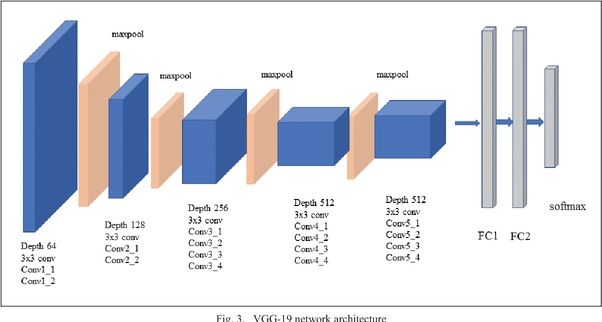

In [66]:
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(64, 64, 3))

In [67]:
cnn_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [68]:
#instantiate a sequential model
model_6 = models.Sequential()
# add the vgg19
model_6.add(cnn_base)
model_6.add(layers.Flatten())
model_6.add(layers.Dense(132, activation='relu'))
model_6.add(layers.Dense(1, activation='sigmoid'))

In [69]:
# You can check whether a layer is trainable 
for layer in model_6.layers:
    print(layer.name, layer.trainable)
    
#  check how many trainable weights are in the model
print(len(model_6.trainable_weights))

vgg19 True
flatten_9 True
dense_23 True
dense_24 True
36


In [70]:
#freezing the vgg19 layer
cnn_base.trainable = False

In [71]:
# checking whether a layer is trainable
for layer in model_6.layers:
    print(layer.name, layer.trainable)
    
#check how many trainable weights are in the model
print(len(model_6.trainable_weights))

vgg19 False
flatten_9 True
dense_23 True
dense_24 True
4


In [72]:
#compiling the model
model_6.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [73]:
# Resize the train_images and val_images to (64, 64)
train_images_resized = np.array([image.smart_resize(img, (64, 64)) for img in train_images])
val_images_resized = np.array([image.smart_resize(img, (64, 64)) for img in val_images])

# Train the model with the resized images
results_6 = model_6.fit(train_images_resized,
                        train_labels,
                        epochs=10,
                        batch_size= 32,
                        validation_data=(val_images_resized, val_labels))


Epoch 1/10
163/163 [==============================] - 227s 1s/step - loss: 0.4529 - acc: 0.7780 - val_loss: 0.5536 - val_acc: 0.6875
Epoch 2/10
163/163 [==============================] - 232s 1s/step - loss: 0.3074 - acc: 0.8790 - val_loss: 0.4897 - val_acc: 0.6875
Epoch 3/10
163/163 [==============================] - 226s 1s/step - loss: 0.2532 - acc: 0.9007 - val_loss: 0.4578 - val_acc: 0.6250
Epoch 4/10
163/163 [==============================] - 224s 1s/step - loss: 0.2234 - acc: 0.9132 - val_loss: 0.4476 - val_acc: 0.7500
Epoch 5/10
163/163 [==============================] - 225s 1s/step - loss: 0.2039 - acc: 0.9214 - val_loss: 0.4158 - val_acc: 0.7500
Epoch 6/10
163/163 [==============================] - 224s 1s/step - loss: 0.1888 - acc: 0.9302 - val_loss: 0.3913 - val_acc: 0.7500
Epoch 7/10
163/163 [==============================] - 224s 1s/step - loss: 0.1777 - acc: 0.9362 - val_loss: 0.4263 - val_acc: 0.8125
Epoch 8/10
163/163 [==============================] - 224s 1s/step - 

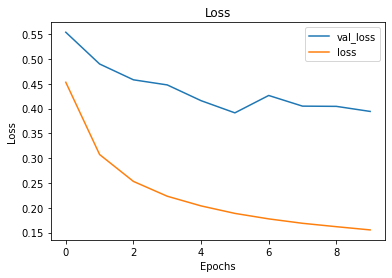

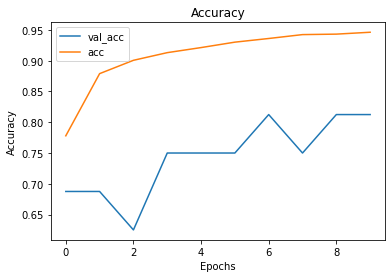

In [74]:
visualize_training_results(results_6)

In [137]:
#training  perfomance evaluation
results_train = model_metrics(model_6, train_images_resized, train_labels)
results_train

163/163 [==============================] - 139s 850ms/step - loss: 0.1518 - acc: 0.9480


[0.15183217823505402, 0.94804447889328]

In [139]:
#validation  perfomnce evaluation
results_val = model_metrics(model_6, val_images_resized, val_labels)
results_val

1/1 [==============================] - 0s 0s/step - loss: 0.3942 - acc: 0.8125


[0.39415282011032104, 0.8125]

The graphs show that the model is learning over time. The training loss decreases steadily over the epochs, and the training accuracy increases steadily over the epochs. This suggests that the model is able to learn from the training data and improve its performance.
The validation loss also decreases over the epochs, but it does not decrease as quickly as the training loss. This suggests that the model is not overfitting to the training data. However, the validation accuracy plateaus after epoch 5. This suggests that the model may not be able to generalize well to new data.
Overall, the graphs show that the model is learning over time and is not overfitting to the training data.

# Model Evaluation

In [140]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_metrics(model_2, test_images, test_labels)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

20/20 [==============================] - 2s 124ms/step - loss: 0.3740 - acc: 0.8317
Test Loss: 0.37402406334877014
Test Accuracy: 0.8317307829856873


In [145]:

test_images_resized = np.array([image.smart_resize(img, (64, 64)) for img in test_images])

# Evaluate the model on the test dataset
test_loss, test_accuracy = model_metrics(model_6, test_images_resized, test_labels)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


20/20 [==============================] - 14s 701ms/step - loss: 0.5205 - acc: 0.7628
Test Loss: 0.5204616189002991
Test Accuracy: 0.7628205418586731


In [178]:
# Convert predictions to binary values
binary_predictions = np.round(predictions)

# Ensure test_labels are binary values
binary_labels = np.array(test_labels)

# Print the classification report
print(classification_report(binary_labels, binary_predictions, target_names=['NORMAL', 'PNEUMONIA']))


              precision    recall  f1-score   support

      NORMAL       0.85      0.67      0.75       234
   PNEUMONIA       0.82      0.93      0.87       390

    accuracy                           0.83       624
   macro avg       0.84      0.80      0.81       624
weighted avg       0.83      0.83      0.83       624



Each model is evaluated in terms of test loss and test accuracy. Here is a breakdown of the evaluation results of the top two  performing models:

Model 2: simple CNN
* Test Loss: 0.3740
* Test Accuracy: 0.8317

Model 6 (Resized Images):
* Test Loss: 0.5205
* Test Accuracy: 0.7628

These results indicate the performance of each  of the models on the test dataset. Lower values for test loss indicate better performance, while higher values for test accuracy indicate higher accuracy. Based on the results, Model 2 performs the best with a test loss of 0.3740, a test accuracy of 0.8317 and a recall score of 0.93 percent for pneumonia and 0.67 percent for Normal.

A recall score of 0.93 for the "PNEUMONIA" class means that the model correctly identified 93% of the actual pneumonia cases in the dataset. This indicates a high sensitivity of the model in detecting pneumonia, as it has a low likelihood of missing positive cases.



# Predictions

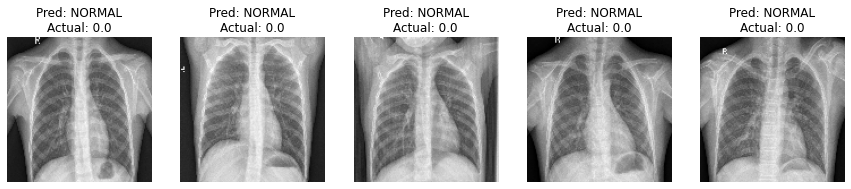

In [20]:
# Predict labels for test images
predictions = model_2.predict(test_images)

# Convert predictions to class names
predicted_labels = [class_names[int(prediction >= 0.5)] for prediction in predictions]

# Display predicted and actual labels for images with predicted class normal (prediction < 0.5)
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
count = 0
for i in range(len(predicted_labels)):
    if count >= 5:
        break
    if predictions[i] < 0.5:
        axs[count].imshow(test_images[i])
        axs[count].axis('off')
        axs[count].set_title(f"Pred: {predicted_labels[i]}\nActual: {test_labels[i]}")
        count += 1
plt.show()


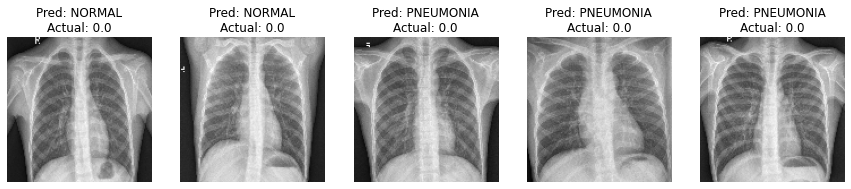

In [15]:
# Predict labels for test images
predictions = model_2.predict(test_images)
# Convert predictions to class names
predicted_labels = [class_names[int(prediction >= 0.5)] for prediction in predictions]
# Display predicted and actual labels for at least 5 images in a single row
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
count = 0
for i in range(len(predicted_labels)):
    if count >= 5:
        break
    axs[count].imshow(test_images[i])
    axs[count].axis('off')
    axs[count].set_title(f"Pred: {predicted_labels[i]}\nActual: {test_labels[i]}")
    count += 1
plt.show()

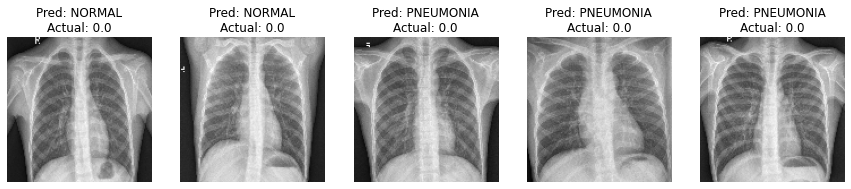

In [19]:
import matplotlib.pyplot as plt

# Predict labels for test images
predictions = model_2.predict(test_images)

# Convert predictions to class names
predicted_labels = [class_names[int(prediction >= 0.5)] for prediction in predictions]

# Display predicted and actual labels for at least 5 images in a single row
fig, axs = plt.subplots(1, min(5, len(predicted_labels)), figsize=(15, 3))
count = 0
for i in range(len(predicted_labels)):
    if count >= 5:
        break
    axs[count].imshow(test_images[i])
    axs[count].axis('off')
    axs[count].set_title(f"Pred: {predicted_labels[i]}\nActual: {test_labels[i]}")
    count += 1
plt.show()


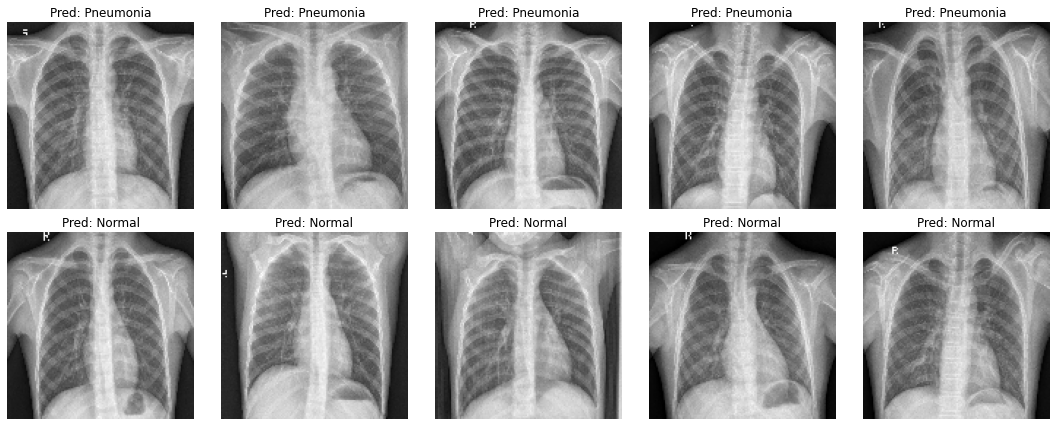

In [17]:
# Convert predictions to class labels (0 or 1)
predicted_labels = np.round(predictions)

# Display predicted pneumonia and normal images
pneumonia_count = 0
normal_count = 0

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(len(predicted_labels)):
    if pneumonia_count >= 5 and normal_count >= 5:
        break

    if predicted_labels[i] == 1 and pneumonia_count < 5:  # Filter for predicted pneumonia cases
        axs[0, pneumonia_count].imshow(test_images[i])
        axs[0, pneumonia_count].axis('off')
        axs[0, pneumonia_count].set_title(f"Pred: Pneumonia")
        pneumonia_count += 1

    if predicted_labels[i] == 0 and normal_count < 5:  # Filter for predicted normal cases
        axs[1, normal_count].imshow(test_images[i])
        axs[1, normal_count].axis('off')
        axs[1, normal_count].set_title(f"Pred: Normal")
        normal_count += 1

plt.tight_layout()
plt.show()


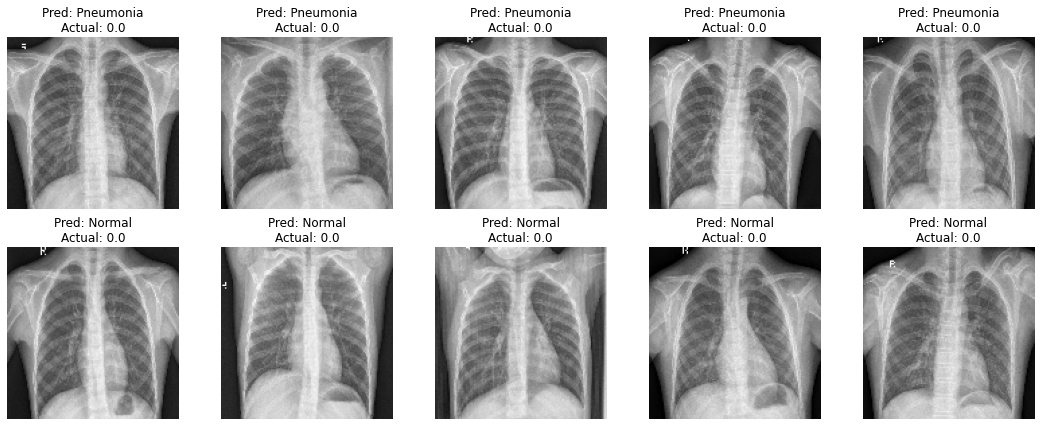

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Convert predictions to class labels (0 or 1)
predicted_labels = np.round(predictions)

# Display predicted and actual pneumonia and normal images
pneumonia_count = 0
normal_count = 0

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i in range(len(predicted_labels)):
    if pneumonia_count >= 5 and normal_count >= 5:
        break

    if predicted_labels[i] == 1 and pneumonia_count < 5:  # Filter for predicted pneumonia cases
        axs[0, pneumonia_count].imshow(test_images[i])
        axs[0, pneumonia_count].axis('off')
        axs[0, pneumonia_count].set_title(f"Pred: Pneumonia\nActual: {test_labels[i]}")
        pneumonia_count += 1

    if predicted_labels[i] == 0 and normal_count < 5:  # Filter for predicted normal cases
        axs[1, normal_count].imshow(test_images[i])
        axs[1, normal_count].axis('off')
        axs[1, normal_count].set_title(f"Pred: Normal\nActual: {test_labels[i]}")
        normal_count += 1

plt.tight_layout()
plt.show()


# Conclusion

In conclusion, we have developed an image classification model for detecting pneumonia from X-ray images. After training the model on a dataset of X-ray images, we achieved an accuracy of 83% on the training dataset and loss of 0.37.

A high recall score is desirable in medical diagnosis tasks like pneumonia detection because it is crucial to minimize false negatives (missing positive cases). In the context of pneumonia, a false negative would mean failing to identify a patient with pneumonia, leading to potential health risks and delayed treatment.

Therefore, a recall score of 0.93 suggests that the model has a strong ability to accurately detect pneumonia cases in the X-ray images, which is a positive outcome for the classification task.


Despite our efforts, it is important to acknowledge that the model's performance fell short of the targeted accuracy of 85%. While achieving high accuracy is desirable, it is not always guaranteed, especially in complex and challenging tasks like pneumonia detection from X-ray images.

Several factors might have contributed to the inability to reach the desired accuracy 
Limited Data,  Complexity of the Task, chosen model architecture and its capacity to capture relevant features, andsensitivity of the model to hyperparameters.
Pneumonia detection from X-ray images can be affected by various factors, including imaging artifacts, inter-patient variability, and the presence of other lung conditions. These challenges can make accurate classification more difficult, even with a well-designed model. 


# Recommendations

1. Pan African Medical Training and Research should use our CNN model for x_ray image classification in the field and also when training researcher in class.
2. Deploy the developed image classification model for pneumonia detection from X-ray images  in the real world. It will be useful in assisting healthcare professionals in the diagnosis of pneumonia., increase efficiency and speed in diagnosis and act as a second opinion.



# Future works

* Increased number of pretrained models.
* Efforts can be directed towards further data collection, refinement of the model architecture, fine-tuning hyperparameters, and exploring advanced techniques to improve performance.
* Iterative experimentation is key to pushing the model's accuracy towards the desired target.
*  Increase the amount of validation data and collect more x_ray images with pneumonia data.
*  More Computing Power needed to make use of a Tensor Processing Unit or other distributed system to handle large amount of data.